In [ ]:
import os
import cv2
import numpy as np
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img
from shutil import copyfile
import matplotlib.pyplot as plt

MENYAMBUNGKAN KE DRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


DATASET PATH

In [ ]:
source_path = '/content/drive/MyDrive/dataset'

source_path_normals = os.path.join(source_path, 'normal')
source_path_cataracts = os.path.join(source_path, 'cataract')
source_path_glaucoma = os.path.join(source_path, 'glaucoma')


# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_normals))} images of normals.")
print(f"There are {len(os.listdir(source_path_cataracts))} images of cataracts.")
print(f"There are {len(os.listdir(source_path_glaucoma))} images of glaucoma.")

There are 66 images of normals.
There are 41 images of cataracts.


direktori sementara

In [ ]:
# Define root directory
root_dir = '/content/drive/MyDrive/normals-v-cataracts'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

# FUNCTION: create_train_val_dirs
def create_train_val_dirs(root_path):

  train_dir = os.path.join(root_path, 'training')
  validation_dir = os.path.join(root_path, 'validation')

  os.makedirs(train_dir)
  os.makedirs(validation_dir)

  os.makedirs(os.path.join(train_dir, 'normals'))
  os.makedirs(os.path.join(train_dir, 'cataracts'))

  os.makedirs(os.path.join(validation_dir, 'normals'))
  os.makedirs(os.path.join(validation_dir, 'cataracts'))

  print(train_dir)
  print(validation_dir)
  print(os.path.join(train_dir, 'normals'))
  print(os.path.join(train_dir, 'cataracts'))
  print(os.path.join(validation_dir, 'normals'))
  print(os.path.join(validation_dir, 'cataracts'))

try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

/content/drive/MyDrive/normals-v-cataracts/training
/content/drive/MyDrive/normals-v-cataracts/validation
/content/drive/MyDrive/normals-v-cataracts/training/normals
/content/drive/MyDrive/normals-v-cataracts/training/cataracts
/content/drive/MyDrive/normals-v-cataracts/validation/normals
/content/drive/MyDrive/normals-v-cataracts/validation/cataracts


In [ ]:
# Test your create_train_val_dirs function

for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/content/drive/MyDrive/normals-v-cataracts/training
/content/drive/MyDrive/normals-v-cataracts/validation
/content/drive/MyDrive/normals-v-cataracts/training/normals
/content/drive/MyDrive/normals-v-cataracts/training/cataracts
/content/drive/MyDrive/normals-v-cataracts/validation/normals
/content/drive/MyDrive/normals-v-cataracts/validation/cataracts


MEMBAGI DATASET KE TRAIN DAN VAL

In [ ]:
def split_data(source_dir, training_dir, validation_dir, split_size):

  source_path = os.listdir(source_dir)
  num_files = len(source_path)
  shuffled = random.sample(source_path, num_files)

  count_train = int(num_files*split_size)
  count_validation = num_files-count_train

  for i in range(count_train):
      source = os.path.join(source_dir, shuffled[i])
      if os.path.getsize(source)==0:
          print(f"{shuffled[i]}, is zero length, so ignoring.")
      else:
          target = os.path.join(training_dir, shuffled[i])
          copyfile(source, target)

  for i in range(count_train, num_files):
      source = os.path.join(source_dir, shuffled[i])
      if os.path.getsize(source) ==0:
          print(f"{shuffled[i]}, is zero length, so ignoring.")
      else:
          target = os.path.join(validation_dir, shuffled[i])
          copyfile(source, target)
  pass

In [ ]:
# Test your split_data function

# Define paths
normal_source_dir = "/content/drive/MyDrive/dataset/normal/"
cataract_source_dir = "/content/drive/MyDrive/dataset/cataract/"

training_dir = "/content/drive/MyDrive/normals-v-cataracts/training/"
validation_dir = "/content/drive/MyDrive/normals-v-cataracts/validation/"

train_normal_dir = os.path.join(training_dir, "normals/")
val_normal_dir = os.path.join(validation_dir, "normals/")

train_cataract_dir = os.path.join(training_dir, "cataracts/")
val_cataract_dir = os.path.join(validation_dir, "cataracts/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(train_normal_dir)) > 0:
  for file in os.scandir(train_normal_dir):
    os.remove(file.path)
if len(os.listdir(train_cataract_dir)) > 0:
  for file in os.scandir(train_cataract_dir):
    os.remove(file.path)
if len(os.listdir(val_normal_dir)) > 0:
  for file in os.scandir(val_normal_dir):
    os.remove(file.path)
if len(os.listdir(val_cataract_dir)) > 0:
  for file in os.scandir(val_cataract_dir):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .8

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(normal_source_dir, train_normal_dir, val_normal_dir, split_size)
split_data(cataract_source_dir, train_cataract_dir, val_cataract_dir, split_size)

# Check that the number of images matches the expected output

# Your function should perform copies rather than moving images so original directories should contain unchanged images
print(f"\n\nOriginal normal's directory has {len(os.listdir(normal_source_dir))} images")
print(f"Original cataract's directory has {len(os.listdir(cataract_source_dir))} images\n")

# Training and validation splits
print(f"There are {len(os.listdir(train_normal_dir))} images of normals for training")
print(f"There are {len(os.listdir(train_cataract_dir))} images of cataracts for training")
print(f"There are {len(os.listdir(val_normal_dir))} images of normals for validation")
print(f"There are {len(os.listdir(val_cataract_dir))} images of cataracts for validation")



Original normal's directory has 66 images
Original cataract's directory has 41 images

There are 52 images of normals for training
There are 32 images of cataracts for training
There are 14 images of normals for validation
There are 9 images of cataracts for validation


Sample normal image:


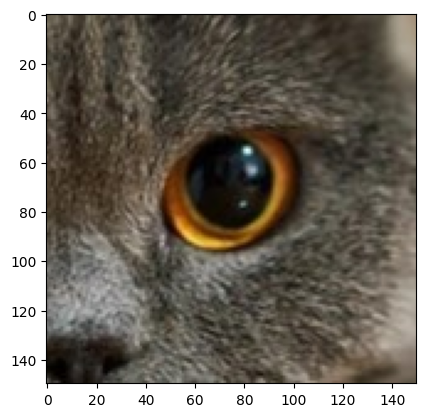


Sample cataract image:


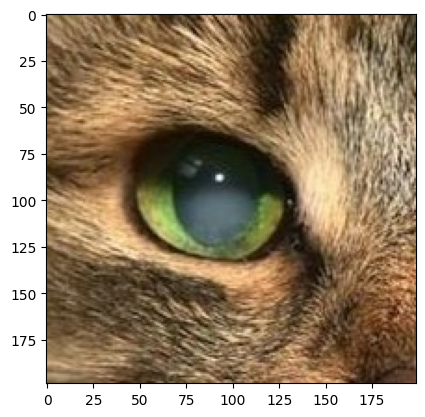

In [ ]:
#tampilkan gambar

print("Sample normal image:")
plt.imshow(load_img(f"{os.path.join(train_normal_dir, os.listdir(train_normal_dir)[0])}"))
plt.show()

print("\nSample cataract image:")
plt.imshow(load_img(f"{os.path.join(train_cataract_dir, os.listdir(train_cataract_dir)[0])}"))
plt.show()

UBAH KE GREYSCALE

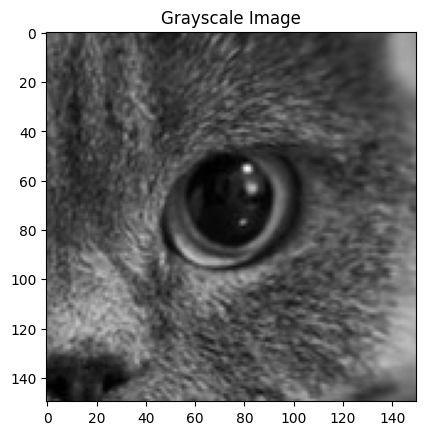

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def grayscale_manual(img):
    # Mengubah citra berwarna menjadi grey scale secara manual
    height, width, _ = img.shape
    img_gray = np.zeros((height, width), dtype=np.uint8)

    for i in range(height):
        for j in range(width):
            # Ambil nilai intensitas warna pada saluran merah (R), hijau (G), dan biru (B)
            r, g, b = img[i, j]

            # Hitung nilai intensitas warna abu-abu
            gray = int(0.299 * r + 0.587 * g + 0.114 * b)

            # Set nilai intensitas warna abu-abu pada citra grey scale
            img_gray[i, j] = gray

    return img_gray

# Choose an example image from the training set
sample_image_path = os.path.join(train_normal_dir, os.listdir(train_normal_dir)[0])

# Membaca citra berwarna
img = cv2.imread(sample_image_path)

# Pemeriksaan apakah citra berhasil dibaca atau tidak
if img is None:
    print("Error: Citra tidak dapat dibaca.")
else:
    # Mengubah citra berwarna menjadi grey scale secara manual
    gray_image = np.mean(img, axis=2)

    # Menampilkan citra berwarna dan citra grey scale
    plt.imshow(gray_image, cmap='gray')
    plt.title('Grayscale Image')
    plt.show()

SPLIT DATA INTO TRAIN AND VAL

In [ ]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):

  # Instantiate the ImageDataGenerator class (don't forget to set the arguments to augment the images)
  train_datagen = ImageDataGenerator(rescale=1./255,
                                    #  rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                    #  shear_range=0.2,
                                    #  zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=15,
                                                      class_mode='binary',
                                                      target_size=(224, 224))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale=1./255)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=15,
                                                                class_mode='binary',
                                                                target_size=(224, 224))

  return train_generator, validation_generator

In [ ]:
# Test the generators
train_generator, validation_generator = train_val_generators(traindir, validdir)

Found 107 images belonging to 2 classes.
Found 107 images belonging to 2 classes.


DEFINE THE ARCHITECTURE

In [ ]:
from tensorflow.keras.optimizers import RMSprop

# GRADED FUNCTION: create_model
def create_model():

  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),

      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),

      tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),

      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dropout(0.5),  # Dropout untuk menghindari overfitting
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])


  model.compile(optimizer=RMSprop(learning_rate=0.001),
                loss='binary_crossentropy',
                metrics=['accuracy'])



  return model

COMPILE MODEL

In [ ]:
# Get the untrained model
model = create_model()

# Train the model
history = model.fit(train_generator,
                    epochs=200,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/200
8/8 [==============================] - 23s 3s/step - loss: 0.9893 - accuracy: 0.5981 - val_loss: 0.7671 - val_accuracy: 0.3832
Epoch 2/200
8/8 [==============================] - 21s 3s/step - loss: 0.7065 - accuracy: 0.5701 - val_loss: 0.6691 - val_accuracy: 0.6168
Epoch 3/200
8/8 [==============================] - 19s 2s/step - loss: 0.6849 - accuracy: 0.5981 - val_loss: 0.6676 - val_accuracy: 0.6168
Epoch 4/200
8/8 [==============================] - 19s 2s/step - loss: 0.6751 - accuracy: 0.6168 - val_loss: 0.6748 - val_accuracy: 0.6168
Epoch 5/200
8/8 [==============================] - 19s 2s/step - loss: 0.6716 - accuracy: 0.5981 - val_loss: 0.6625 - val_accuracy: 0.6168
Epoch 6/200
8/8 [==============================] - 18s 2s/step - loss: 0.7830 - accuracy: 0.5794 - val_loss: 0.6755 - val_accuracy: 0.6168
Epoch 7/200
8/8 [==============================] - 21s 3s/step - loss: 0.6718 - accuracy: 0.6262 - val_loss: 0.8991 - val_accuracy: 0.6168
Epoch 8/200
8/8 [==========

In [ ]:
# Tampilkan nilai akurasi rata-rata
average_accuracy = sum(history.history['accuracy']) / len(history.history['accuracy'])
print(f"Average Accuracy: {average_accuracy}")

Average Accuracy: 0.8345794400572777


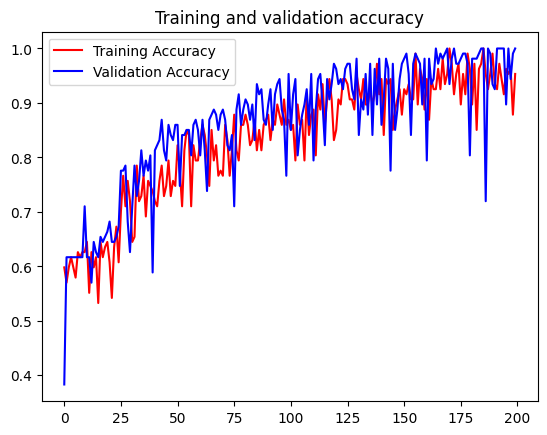

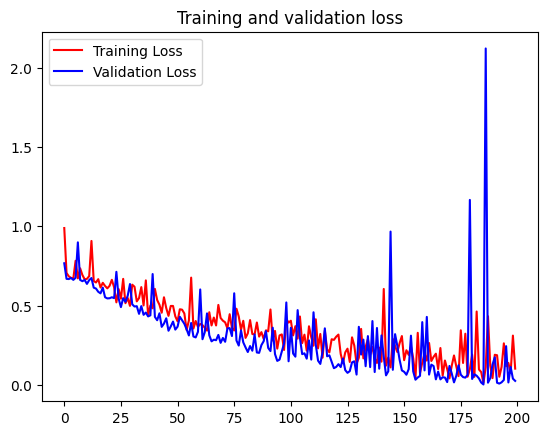

In [ ]:
import matplotlib.pyplot as plt

# Retrieve a list of list results on training and test data
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))  # Get number of epochs

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'r', label="Training Accuracy")    # Memberi warna merah pada garis training accuracy
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")  # Memberi warna biru pada garis validation accuracy
plt.title('Training and validation accuracy')
plt.legend()  # Menampilkan legenda
plt.show()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r', label="Training Loss")    # Memberi warna merah pada garis training loss
plt.plot(epochs, val_loss, 'b', label="Validation Loss")  # Memberi warna biru pada garis validation loss
plt.legend()  # Menampilkan legenda
plt.title('Training and validation loss')
plt.show()

In [ ]:
# The code below is to save your model as a .h5 file.
# It will be saved automatically in your Submission folder.
if __name__ == '__main__':
    # DO NOT CHANGE THIS CODE
    model = create_model()
    model.save("create_model.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
